# Multivariate Linear Regression


In this project we are going to study the relationship of a range of continuous (quantitative) variables using Multivariate Linear Regression. 

#### Loading modules.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse

### Reading the csv file.

In [34]:
salary = pd.read_csv('resources/salary.csv')
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [35]:
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### Split the data into a training and test set   

In [98]:
# Filling my NaN value with the mean of the column
salary = salary.apply(lambda x: x.fillna(x.mean()))

In [99]:
# Creating the target variable for the test and training sets of data
X = salary.drop('salary', axis = 1)
y = salary['salary']

# Splitting the data into test and training sets by 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)
print(X_train.shape)
print(y_train.shape)


(385, 10)
(385,)


In [100]:
from scipy.stats import iqr
iqr= iqr(y_train)
iqr

20056.0

In [101]:
q3 = np.percentile(y_train, 75)
upper_bound = q3+ 1.5 * iqr
upper_bound

90140.0

In [102]:
y_train[y_train > upper_bound]

280    91405.0
Name: salary, dtype: float64

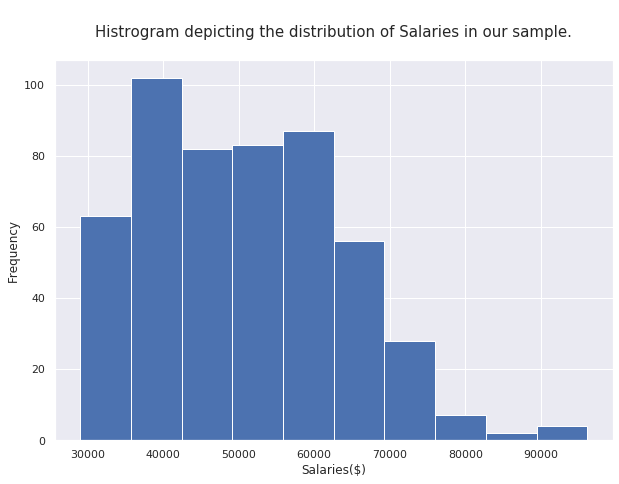

In [59]:

sns.set()
plt.figure(figsize = (10,7))
plt.hist(salary['salary'])
plt.title('\nHistrogram depicting the distribution of Salaries in our sample.\n',fontsize=15)
plt.xlabel('Salaries($)')
plt.ylabel('Frequency')
plt.show()

In [60]:
missing_values = X_train.isnull().sum().sum()
print('Number of missing values:',missing_values)

highest =  X_train.max()
print('The highest value is: ', highest)

Number of missing values: 0
The highest value is:  exprior         25.00
yearsworked     41.00
yearsrank       28.00
market           1.33
degree           1.00
otherqual        1.00
position         3.00
male             1.00
Field            4.00
yearsabs       118.00
dtype: float64


In [61]:
X_train.describe()

,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,2.883117,12.916883,7.007792,0.944416,0.958442,0.051948,2.124675,0.745455,2.529870,6.825974
std,4.683120,9.470533,6.396812,0.148151,0.199838,0.222211,0.835438,0.436172,1.108568,16.853639
min,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.000000,11.000000,5.000000,0.910000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,4.000000,22.000000,11.000000,1.000000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [62]:
y_train.describe()

count      385.000000
mean     50699.727547
std      12504.527436
min      29500.000000
25%      40000.000000
50%      49667.000000
75%      60056.000000
max      91405.000000
Name: salary, dtype: float64

### Running a simple linear regression for Salary with one predictor variable: Years Worked.

In [63]:
x_train = sm.add_constant(X_train['yearsworked'])

model = sm.OLS(y_train, x_train).fit()

# Print the coefficients
print(model.params)
print(model.summary())

const          39638.903313
yearsworked      856.307527
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     278.0
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           2.55e-47
Time:                        17:30:03   Log-Likelihood:                -4072.8
No. Observations:                 385   AIC:                             8150.
Df Residuals:                     383   BIC:                             8157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [64]:
print('R2: ', model.rsquared)

R2:  0.42060436370943977


In [65]:
print('P-value: ',model.pvalues)

P-value:  const          9.756688e-165
yearsworked     2.548793e-47
dtype: float64


### Expected salary for someone with 12 years’ work experience.

In [66]:
# year_12 = pd.DataFrame({'yearsworked':[12]})
print('Someone who has worked for 12 years earns:',model.predict([1,12]))

Someone who has worked for 12 years earns: [49914.59363274]


### Expected salary for someone with 80 years

In [67]:
print('Someone who has worked for 80 years earns:',model.predict([1,80]))

Someone who has worked for 80 years earns: [108143.50544219]


### Other employee characteristics might influence their salary?

Other factors that can infulence salary are:
- Years ranked.
- Market.
- Experience prior
- Position

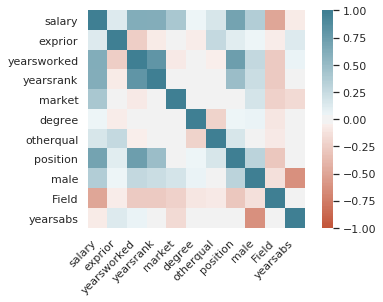

In [68]:
correlation = salary.corr()

ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

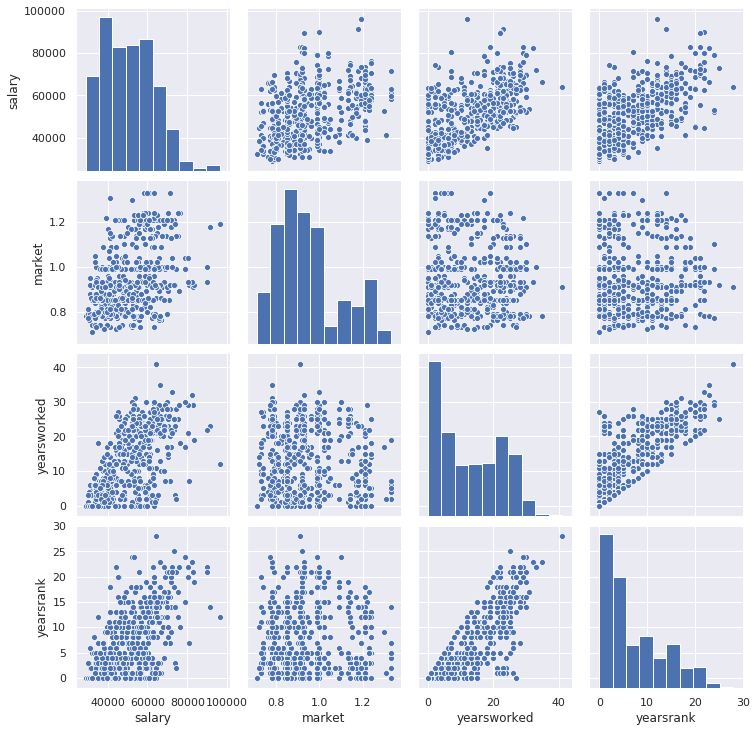

In [69]:
salary_corr = salary[['salary', 'market', 'yearsworked', 'yearsrank']]

sns.pairplot(salary_corr)
plt.show()

In [70]:
# Take the log of population and gdp_per_capita
salary_corr['log_yearsworked'] = np.log10(salary_corr['yearsworked'])
salary_corr['log_salary'] = np.log10(salary_corr['salary'])

# Drop the non-transformed columns
salary_corr = salary_corr.drop(columns = ['yearsworked', 'salary'])

/home/recruit/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/recruit/.local/lib/python3.6/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/recruit/.local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWa

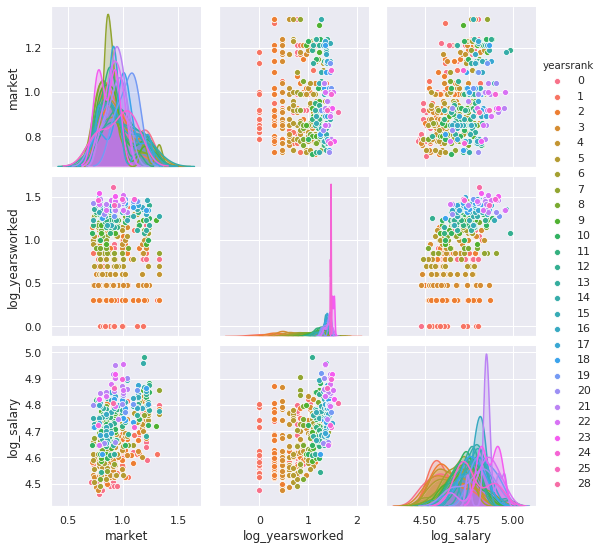

In [71]:
sns.pairplot(salary_corr, hue = 'yearsrank')
plt.show()

### Model run on the train set.

In [82]:
pred = model.predict(x_train)

from statsmodels.tools.eval_measures import rmse
rmse = rmse(y_train, pred)
rmse

9505.832144534927

### How does your model compare when running it on the test set

In [84]:
x_test = sm.add_constant(X_test['yearsworked'])

ypred = model.predict(x_test)

from statsmodels.tools.eval_measures import rmse
rmse = rmse(y_test, ypred)
rmse

nan

Our model performs better on the train dataset than it does on the test set. With this we can now conclude that the model is overfitted. We say this because our model shows low bias but high variance. To better train our model we need to identify relevant variables and terms that you are likely to influence our outcome that we hoping for and include in the own model.